<a href="https://colab.research.google.com/github/ancka019/data_analysis-/blob/main/HW4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

In [4]:
import geopandas as gpd
import contextily as ctx

In [5]:
df = pd.read_csv('/content/ALL_SPB_STOPS.csv', sep=';', encoding='Windows-1251', decimal=',')

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

      ID_STOP                                          STOP_NAME  \
0      100101                                     Пр.Ветеранов-1   
1      100102                                     Пр.Ветеранов-2   
2      100103                                    Ленинский пр.-1   
3      100104                                    Ленинский пр.-2   
4      100105                                             Автово   
5      100106                                    Кировский завод   
6      100107                                           Нарвская   
7      100108                                         Балтийская   
8      100109                                         Пушкинская   
9      100110                                       Владимирская   
10     100111                                    Пл. Восстания-1   
11     100112                                    Пл. Восстания-2   
12     100113                                       Чернышевская   
13     100114                                   

In [7]:
metro = df[df['ID_STOP'].astype('str').str.match('100')]
metro

ID_STOP           STOP_NAME          LATITUDE         LONGITUDE
0    100101      Пр.Ветеранов-1  59.8416038827508  30.2539842396693
1    100102      Пр.Ветеранов-2  59.8420417837763    30.25008403131
2    100103     Ленинский пр.-1  59.8516834239607  30.2683847248898
3    100104     Ленинский пр.-2  59.8497096845857  30.2683477910985
4    100105              Автово  59.8672920598579  30.2611327749718
..      ...                 ...               ...               ...
70   100513          Чкаловская  59.9609866306347  30.2920463582738
71   100514  Крестовский остров  59.9717924205307  30.2594135069873
72   100515      Старая Деревня  59.9895383917864  30.2552178282978
73   100516   Комендантский пр.  60.0078102700019  30.2594762944325
74   100530        Спортивная-2  59.9477969616639  30.2836697744112

[75 rows x 4 columns]

In [63]:
List = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))
List.crs = "EPSG:4326"
List

ID_STOP  ...                   geometry
0      100101  ...  POINT (30.25398 59.84160)
1      100102  ...  POINT (30.25008 59.84204)
2      100103  ...  POINT (30.26838 59.85168)
3      100104  ...  POINT (30.26835 59.84971)
4      100105  ...  POINT (30.26113 59.86729)
...       ...  ...                        ...
7149     4997  ...  POINT (30.26613 59.95070)
7150     4998  ...  POINT (30.27197 59.94570)
7151     5003  ...  POINT (30.30926 59.93603)
7152     7069  ...  POINT (30.39257 60.03144)
7153     7070  ...  POINT (30.39370 60.03380)

[7154 rows x 5 columns]

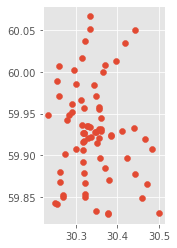

In [40]:
gmetro = gpd.GeoDataFrame(
    metro, geometry=gpd.points_from_xy(metro.LONGITUDE, metro.LATITUDE))
gmetro.crs = "EPSG:4326"
gmetro.plot();

In [64]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))
gdf.crs = "EPSG:4326"
gdf

ID_STOP  ...                   geometry
0      100101  ...  POINT (30.25398 59.84160)
1      100102  ...  POINT (30.25008 59.84204)
2      100103  ...  POINT (30.26838 59.85168)
3      100104  ...  POINT (30.26835 59.84971)
4      100105  ...  POINT (30.26113 59.86729)
...       ...  ...                        ...
7149     4997  ...  POINT (30.26613 59.95070)
7150     4998  ...  POINT (30.27197 59.94570)
7151     5003  ...  POINT (30.30926 59.93603)
7152     7069  ...  POINT (30.39257 60.03144)
7153     7070  ...  POINT (30.39370 60.03380)

[7154 rows x 5 columns]

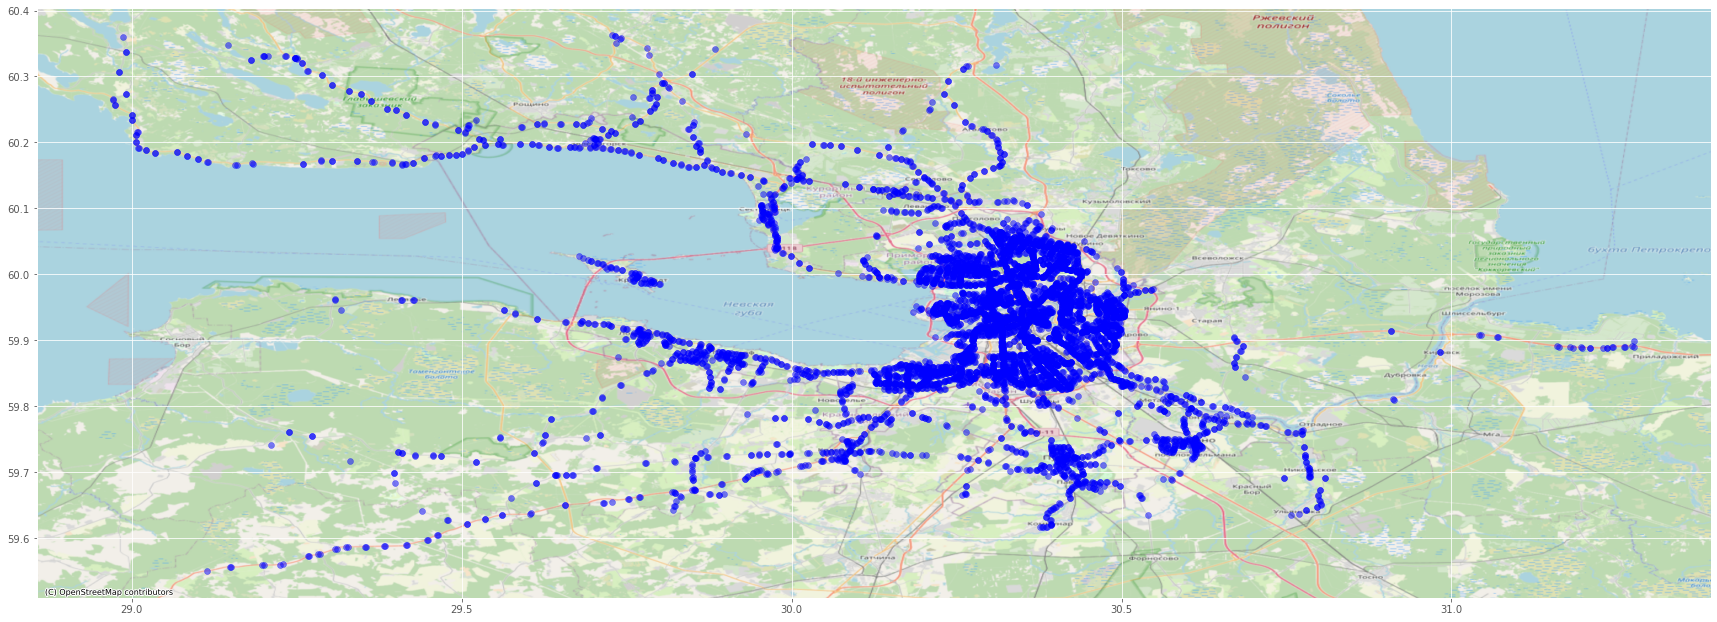

In [13]:
ax = List.plot(color="blue", figsize=(30, 30), alpha=0.5)
ctx.add_basemap(ax, 
                crs=gdf.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)


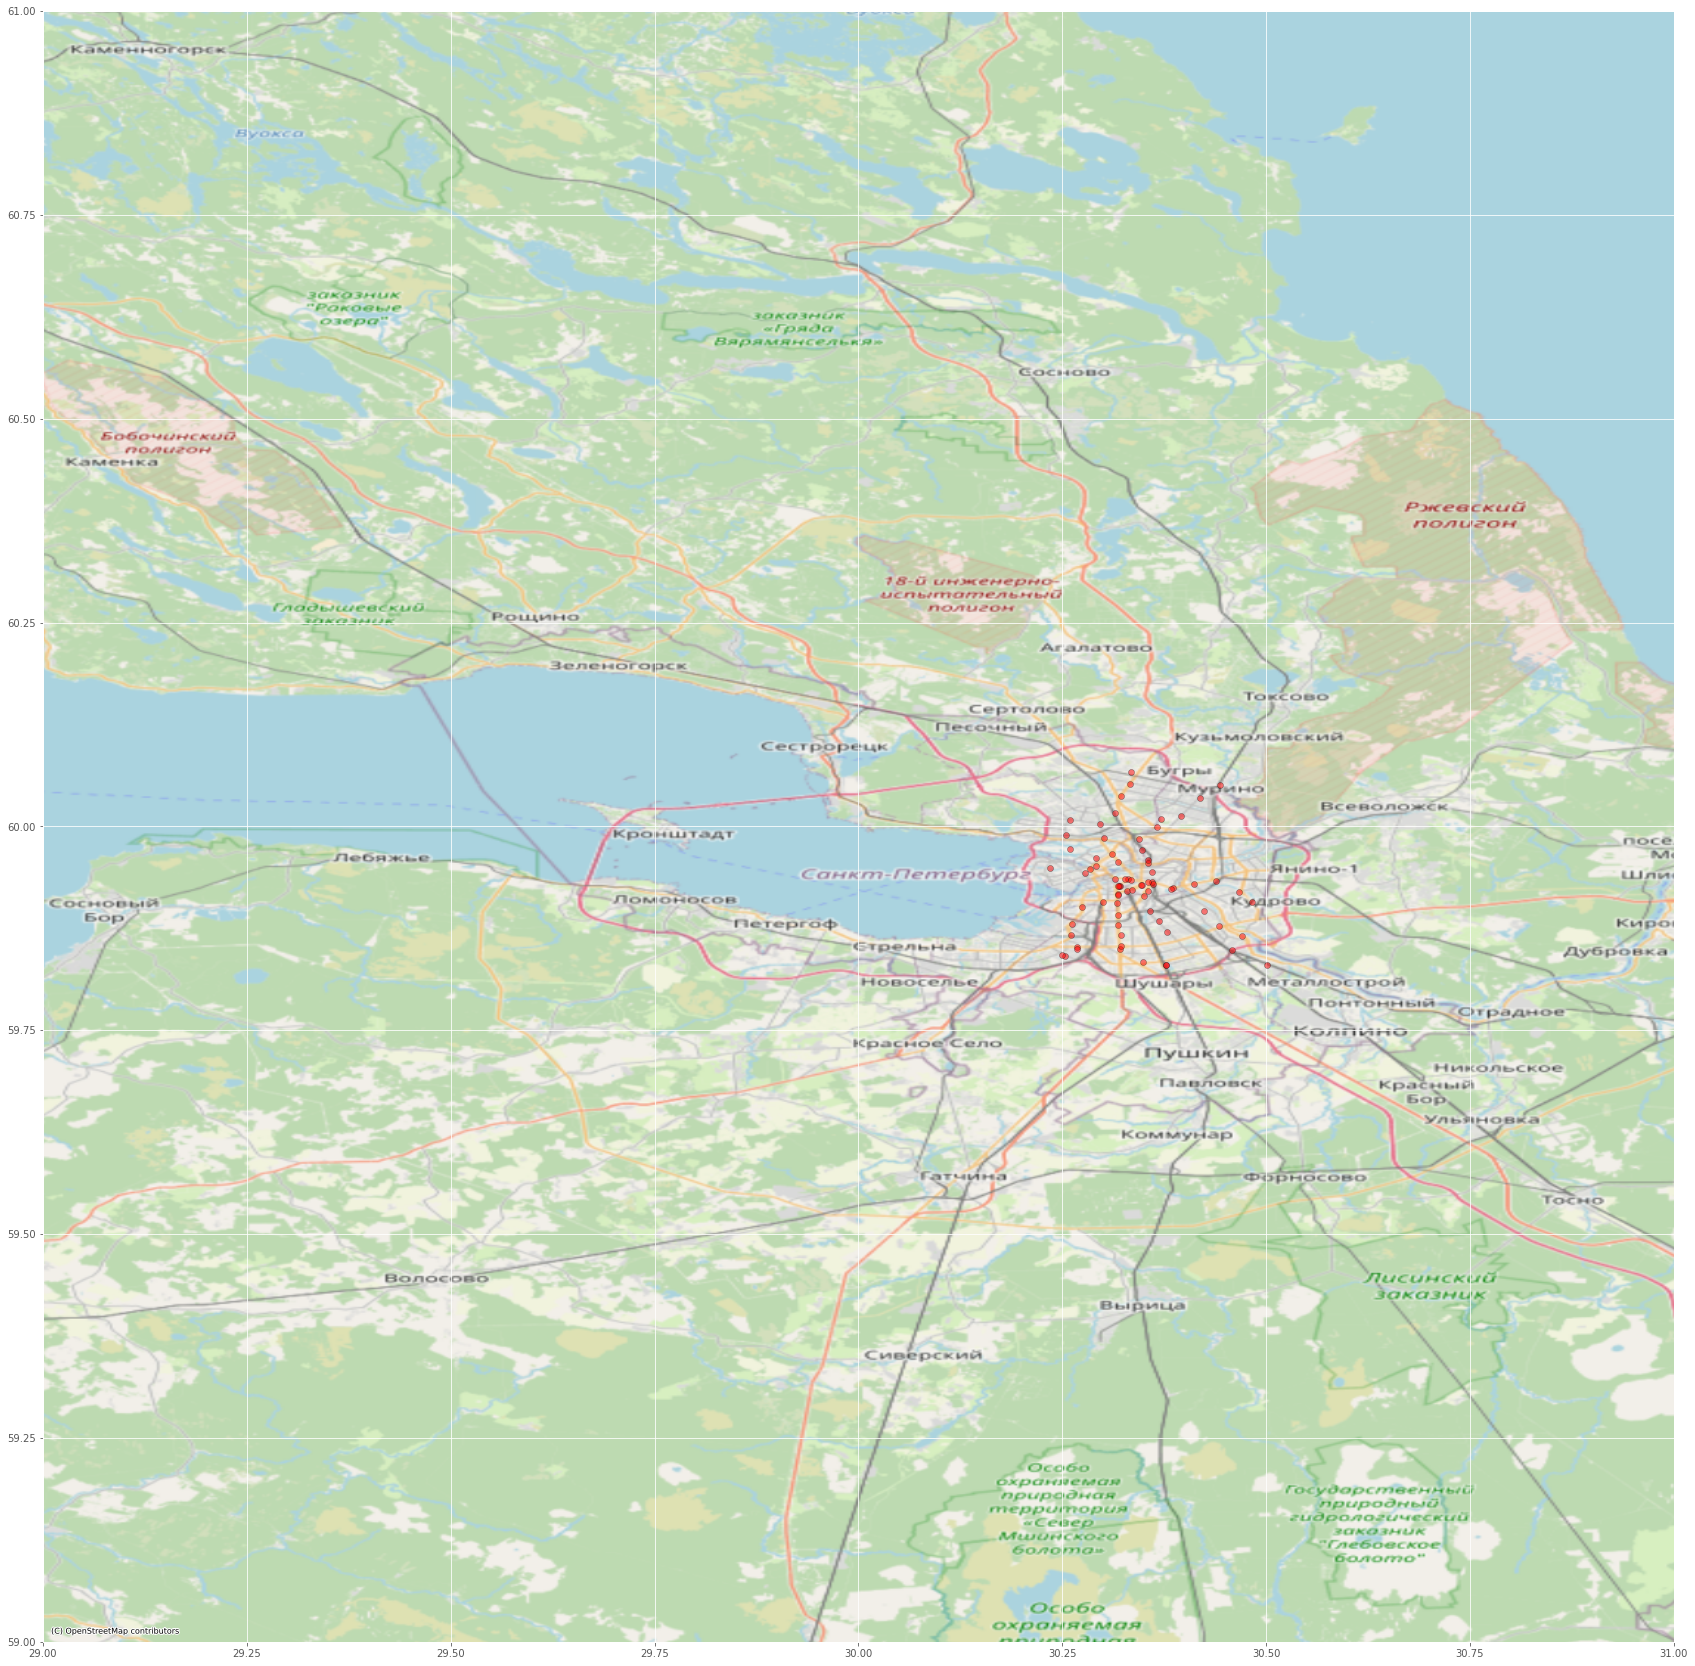

In [14]:
ax = gmetro.plot(color="red", figsize=(30, 30), alpha=0.5, edgecolor='k')
ax.axis((29, 31, 59, 61))
ctx.add_basemap(ax, crs=gmetro.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

In [73]:
gdf.to_crs(epsg=3310,inplace=True)
gmetro.to_crs(epsg=3310,inplace=True)
near = gdf[gdf.distance(gmetro.geometry[45]) < 1000]
near.to_crs(epsg=4326,inplace=True)
near

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


ID_STOP  ...                   geometry
45     100302  ...  POINT (30.27831 59.94271)
74     100530  ...  POINT (30.28367 59.94780)
76       1285  ...  POINT (30.27176 59.94112)
77       1287  ...  POINT (30.26414 59.93880)
78       1290  ...  POINT (30.28701 59.94454)
107      1329  ...  POINT (30.28000 59.93911)
823     15459  ...  POINT (30.29310 59.93950)
828     15463  ...  POINT (30.29170 59.94080)
829     15464  ...  POINT (30.28670 59.94469)
1034     1569  ...  POINT (30.28571 59.94587)
1379    16037  ...  POINT (30.27070 59.94080)
1384    16041  ...  POINT (30.27832 59.94303)
1387    16045  ...  POINT (30.28532 59.94508)
1517    16182  ...  POINT (30.28543 59.94593)
1521    16186  ...  POINT (30.27875 59.94324)
1526    16191  ...  POINT (30.27118 59.94102)
1528    16194  ...  POINT (30.26374 59.93886)
2127    16784  ...  POINT (30.29139 59.94069)
2729    18232  ...  POINT (30.26574 59.93984)
3888    19806  ...  POINT (30.26704 59.94484)
3889    19807  ...  POINT (30.26601 59.94474)
3893    19810  ...  POINT (30.27231 59.94639)
3895    19814  ...  POINT (30.28096 59.94855)
3896    19818  ...  POINT (30.27077 59.94625)
4382     2059  ...  POINT (30.28049 59.94377)
4679    22155  ...  POINT (30.26800 59.94018)
5502     2496  ...  POINT (30.29158 59.94093)
5503     2497  ...  POINT (30.28009 59.93495)
5517     2500  ...  POINT (30.27575 59.93328)
5708     2595  ...  POINT (30.28991 59.94225)
5709     2596  ...  POINT (30.28111 59.93782)
5855    27086  ...  POINT (30.28404 59.94674)
5859    27118  ...  POINT (30.28411 59.94730)
5963     2776  ...  POINT (30.28512 59.94512)
6077    28355  ...  POINT (30.26399 59.93879)
6078    28356  ...  POINT (30.27170 59.94103)
6079    28357  ...  POINT (30.28001 59.94347)
6080    28358  ...  POINT (30.28511 59.94515)
6081    28359  ...  POINT (30.28023 59.94371)
6083    28360  ...  POINT (30.27519 59.94224)
6084    28361  ...  POINT (30.26793 59.94012)
6397     3248  ...  POINT (30.28021 59.94349)
6674     3610  ...  POINT (30.29309 59.93951)
6945     4494  ...  POINT (30.27625 59.94205)
6954     4519  ...  POINT (30.27487 59.94216)
7057     4698  ...  POINT (30.29140 59.94081)
7141     4983  ...  POINT (30.27516 59.94349)
7142     4984  ...  POINT (30.27127 59.94676)
7150     4998  ...  POINT (30.27197 59.94570)

[49 rows x 5 columns]

In [74]:
near = pd.DataFrame(near.drop(columns=['geometry', 'ID_STOP', 'STOP_NAME']))
near['LATITUDE'] = pd.to_numeric(near['LATITUDE'])
near['LONGITUDE'] = pd.to_numeric(near['LONGITUDE'])
near.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 45 to 7150
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LATITUDE   49 non-null     float64
 1   LONGITUDE  49 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


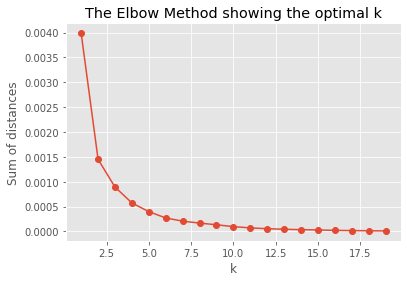

In [75]:
K = range(1, 20)
models = [KMeans(n_clusters=k, random_state=42).fit(near) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [76]:
model = KMeans(n_clusters=11, random_state=42)
# random_state - зерно датчика случайных чисел. 
# При каждом новом вызове с одинаковыми random_state модель будет давать
# одинаковые результаты.

In [77]:
model.fit(near)
near['cluster'] = model.labels_
near.groupby('cluster');

In [78]:
near.head()

LATITUDE  LONGITUDE  cluster
45  59.942713  30.278305        6
74  59.947797  30.283670        8
76  59.941121  30.271757        7
77  59.938798  30.264141        2
78  59.944538  30.287008        3

In [79]:
gnear = gpd.GeoDataFrame(
    near, geometry=gpd.points_from_xy(near.LONGITUDE, near.LATITUDE))
gnear.crs = "EPSG:4326"
gnear.head()

LATITUDE  LONGITUDE  cluster                   geometry
45  59.942713  30.278305        6  POINT (30.27831 59.94271)
74  59.947797  30.283670        8  POINT (30.28367 59.94780)
76  59.941121  30.271757        7  POINT (30.27176 59.94112)
77  59.938798  30.264141        2  POINT (30.26414 59.93880)
78  59.944538  30.287008        3  POINT (30.28701 59.94454)

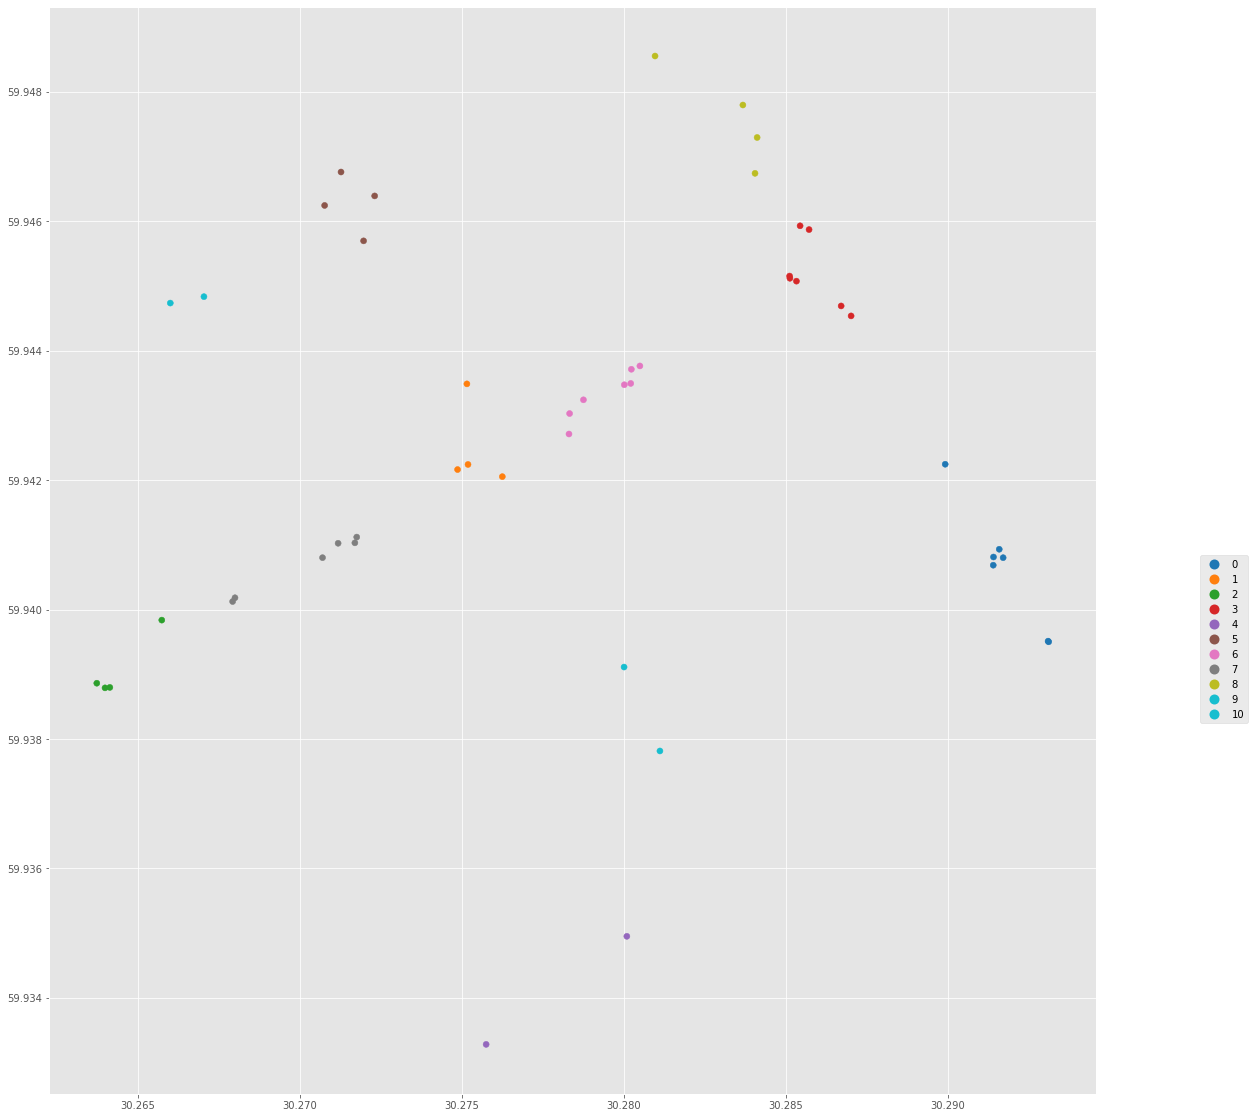

In [80]:
fig, ax = plt.subplots(figsize=(20, 20))

gnear.plot(column='cluster',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

plt.show()

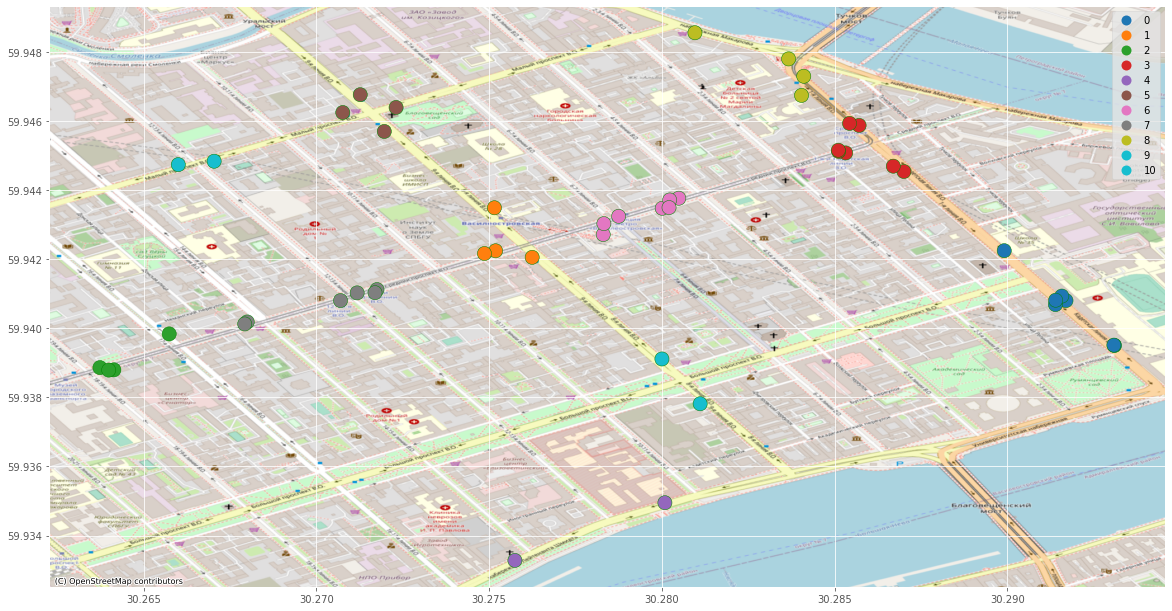

In [81]:
#@title
ax = gnear.plot(column='cluster',
                categorical=True,
                legend=True,
               figsize=(20, 30), alpha=1, edgecolor='g', markersize= 200)
ctx.add_basemap(ax, 
                crs=gnear.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)